In [1]:
# Telling matplotlib to work in the program and not as an external window
%matplotlib inline                  
from nptdms import TdmsFile           # Handling TDMS files
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl
import numpy as np
from numpy import *
import matplotlib.cm as cm
import time
from scipy.optimize import curve_fit
import scipy
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import seaborn as sns; import pandas as pd
import warnings
from scipy.optimize import OptimizeWarning
plt.rcParams.update({'font.size': 14})
import matplotlib.gridspec as gridspec

In [27]:
dt = 0.05
videosize = 1000        #800, 521, 256, 128
binning = 1
frametransfer = True#False
flashtime = 0.01
verticalshift = 1.9176e-6
dtprogram = 10e-3
dtcamtoPC = 1e-3
dtPCtoADwin = 1e-3

check = True
dtframetransfer = videosize/binning * verticalshift
dtreadout = (1032/27e6+verticalshift)*videosize/binning
if frametransfer == True:
    dtexphalf = dt/2
    dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
    print('Frame transfer:')
    if dtreadout > dt:
        check = False
        dtnew = dtreadout
        dtexphalf = dtnew/2
        dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
        print('dt has been increases from ',round(dt*1000,1),'ms to',round(dtnew*1000,1),'ms')
    dtcycle = dt + dtframetransfer
    
else:
    dtexphalf = flashtime/2
    dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
    dttest = flashtime + dtframetransfer + dtreadout
    dtcycle = dt
    print('No Frame transfer:')
    if dttest > dt: 
        check = False
        dtnew = dttest
        dtcycle = dttest    
        print('dt has been increases from ',round(dt*1000,1),'ms to',round(dtnew*1000,1),'ms')

if check == True:
    print('dt = ',round(dt*1000,1),'ms - delay = ',round(dttotal*1000,1),'ms - cycle time = ',round(dtcycle*1000,1),'ms')   
else:
    print('dt = ',round(dtnew*1000,1),'ms - delay = ',round(dttotal*1000,1),'ms - cycle time = ',round(dtcycle*1000,1),'ms')   

Frame transfer:
dt =  50.0 ms - delay =  79.1 ms - cycle time =  51.9 ms


In [113]:
length = 100
videosizewave = [128,256,521,800,1000]
dtwave = np.linspace(0.001,0.1,length)
savewave = np.zeros((7,length*2*5))

for i in range(length*2*5):
    dt = dtwave[i%length]#0.05
    if i < length*5: frametransfer = True
    else: frametransfer = False
    videosize = videosizewave[int(floor(i%(length*5)/length))]
    binning = 2
    
    flashtime = 0.01
    verticalshift = 1.9176e-6
    dtprogram = 10e-3
    dtcamtoPC = 1e-3
    dtPCtoADwin = 1e-3

    check = True
    dtnew = dt
    dtframetransfer = videosize/binning * verticalshift
    dtreadout = (1032/27e6+verticalshift)*videosize/binning
    if frametransfer == True:
        dtexphalf = dt/2
        dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
        #print('Frame transfer:')
        if dtreadout > dt:
            check = False
            dtnew = dtreadout
            dtexphalf = dtnew/2
            dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
            #print('dt has been increases from ',round(dt*1000,1),'ms to',round(dtnew*1000,1),'ms')
        dtcycle = dtnew + dtframetransfer

    else:
        dtexphalf = flashtime/2
        dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
        dttest = flashtime + dtframetransfer + dtreadout
        dtcycle = dt
        #print('No Frame transfer:')
        if dttest > dt: 
            check = False
            dtnew = dttest
            dtcycle = dttest    
            #print('dt has been increases from ',round(dt*1000,1),'ms to',round(dtnew*1000,1),'ms')

    if frametransfer == True: savewave[0,i] = 0
    else: savewave[0,i] = 1
    savewave[1,i] = dt*1000
    savewave[2,i] = dtnew*1000
    savewave[3,i] = dttotal*1000
    savewave[4,i] = dtcycle*1000
    savewave[5,i] = videosize
    savewave[6,i] = binning
            
    #if check == True:
    #    print('dt = ',round(dt*1000,1),'ms - delay = ',round(dttotal*1000,1),'ms - cycle time = ',round(dtcycle*1000,1),'ms')   
    #else:
    #    print('dt = ',round(dtnew*1000,1),'ms - delay = ',round(dttotal*1000,1),'ms - cycle time = ',round(dtcycle*1000,1),'ms')   

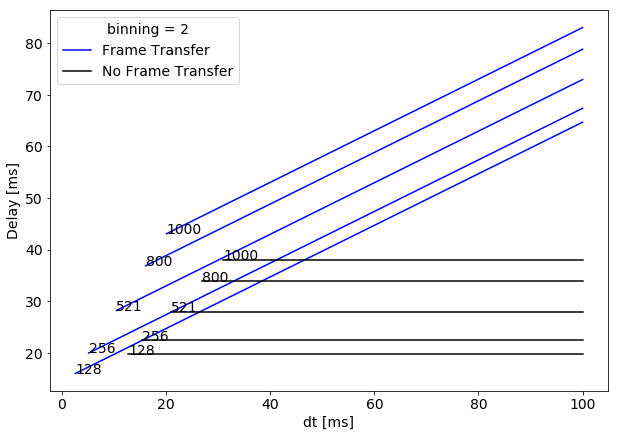

In [114]:
x = 2
xlabel = 'dt [ms]'
y = 3
ylabel = 'Delay [ms]'
fig=plt.figure(1, figsize = (10,7) )
ax = plt.subplot(1,1,1)
for i in range(5):
    plt.plot(savewave[x,length*i:length*i+length],savewave[y,length*i:length*i+length],'b',label='Frame Transfer')
    plt.text(savewave[x,length*i],savewave[y,length*i],str(int(savewave[5,length*i])))
for i in range(5,10):
    plt.plot(savewave[x,length*i:length*i+length],savewave[y,length*i:length*i+length],'k',label='No Frame Transfer')
    plt.text(savewave[x,length*i],savewave[y,length*i],str(int(savewave[5,length*i])))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(title='binning = '+str(binning))
plt.savefig('Layout Delay Binning'+str(binning)+'.pdf', format='pdf')
plt.show()

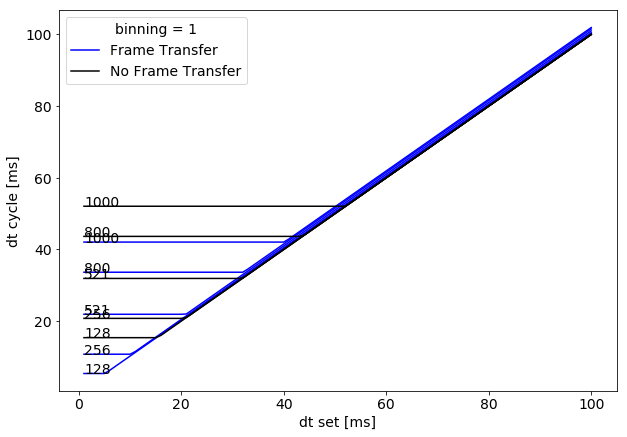

In [112]:
x = 1
xlabel = 'dt set [ms]'
y = 4
ylabel = 'dt cycle [ms]'
fig=plt.figure(1, figsize = (10,7) )
ax = plt.subplot(1,1,1)
for i in range(5):
    plt.plot(savewave[x,length*i:length*i+length],savewave[y,length*i:length*i+length],'b',label='Frame Transfer')
    plt.text(savewave[x,length*i],savewave[y,length*i],str(int(savewave[5,length*i])))
for i in range(5,10):
    plt.plot(savewave[x,length*i:length*i+length],savewave[y,length*i:length*i+length],'k',label='No Frame Transfer')
    plt.text(savewave[x,length*i],savewave[y,length*i],str(int(savewave[5,length*i])))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(title='binning = '+str(binning))
plt.savefig('Layout Delay test Binning'+str(binning)+'.pdf', format='pdf')
plt.show()



## Test Flashlight at the end for frame transfer

In [85]:
videosizewave = [128,256,521,800,1000]
dtwave = np.linspace(0.001,0.1,10)
savewave = np.zeros((7,100))

for i in range(100):
    dt = dtwave[i%10]#0.05
    if i < 50: frametransfer = True
    else: frametransfer = False
    videosize = videosizewave[int(floor(i%50/10))]
    #print(videosize)
    #videosize = 1000        #800, 521, 256, 128
    binning = 1
    
    flashtime = 0.01
    verticalshift = 1.9176e-6
    dtprogram = 10e-3
    dtcamtoPC = 1e-3
    dtPCtoADwin = 1e-3

    check = True
    dtnew = dt
    dtframetransfer = videosize/binning * verticalshift
    dtreadout = (1032/27e6+verticalshift)*videosize/binning
    if frametransfer == True:
        dtexphalf = flashtime/2
        dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
        #print('Frame transfer:')
        if dtreadout > dt:
            check = False
            dtnew = dtreadout
            dtexphalf = flashtime/2
            dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
            #print('dt has been increases from ',round(dt*1000,1),'ms to',round(dtnew*1000,1),'ms')
        dtcycle = dtnew + dtframetransfer

    else:
        dtexphalf = flashtime/2
        dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
        dttest = flashtime + dtframetransfer + dtreadout
        dtcycle = dt
        #print('No Frame transfer:')
        if dttest > dt: 
            check = False
            dtnew = dttest
            dtcycle = dttest    
            #print('dt has been increases from ',round(dt*1000,1),'ms to',round(dtnew*1000,1),'ms')

    if frametransfer == True: savewave[0,i] = 0
    else: savewave[0,i] = 1
    savewave[1,i] = dt*1000
    savewave[2,i] = dtnew*1000
    savewave[3,i] = dttotal*1000
    savewave[4,i] = dtcycle*1000
    savewave[5,i] = videosize
    savewave[6,i] = binning
            
    #if check == True:
    #    print('dt = ',round(dt*1000,1),'ms - delay = ',round(dttotal*1000,1),'ms - cycle time = ',round(dtcycle*1000,1),'ms')   
    #else:
    #    print('dt = ',round(dtnew*1000,1),'ms - delay = ',round(dttotal*1000,1),'ms - cycle time = ',round(dtcycle*1000,1),'ms')   

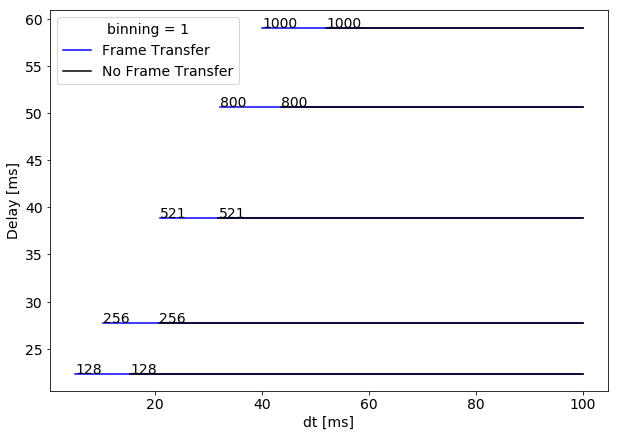

In [86]:
x = 2
xlabel = 'dt [ms]'
y = 3
ylabel = 'Delay [ms]'
fig=plt.figure(1, figsize = (10,7) )
ax = plt.subplot(1,1,1)
for i in range(5):
    plt.plot(savewave[x,10*i:10*i+10],savewave[y,10*i:10*i+10],'b',label='Frame Transfer')
    plt.text(savewave[x,10*i],savewave[y,10*i],str(int(savewave[5,10*i])))
for i in range(5,10):
    plt.plot(savewave[x,10*i:10*i+10],savewave[y,10*i:10*i+10],'k',label='No Frame Transfer')
    plt.text(savewave[x,10*i],savewave[y,10*i],str(int(savewave[5,10*i])))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(title='binning = '+str(binning))
plt.savefig('Layout Delay Flashlight Binning'+str(binning)+'.pdf', format='pdf')
plt.show()

